## Code for Linear Regression and Decision Tree

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
import pydotplus
from datetime import timezone, datetime
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import LabelEncoder
#from sklearn.compose import ColumnTransformer 
import datetime as dt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold 
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import classification_report, confusion_matrix

### Importing Dataset
hingek10.csv and hingek20.csv are the training results of the low rank model of clustering the patients' information. Diabetes_Numerical.csv is the dataset used for training linear regression and decision tree models.

In [2]:
hinge10 = pd.read_csv('../data/hingek10.csv')
hinge20 = pd.read_csv('../data/hingek20.csv')
origin20 = pd.read_csv('../data/GLRMk20.csv')
origin5 = pd.read_csv('../data/GLRMk5.csv')
df_pat = pd.read_csv('../data/Diabetes_Numerical.csv')
hinge_param6 = pd.read_csv('../data/hingeparam6.csv')
hinge_param7 = pd.read_csv('../data/hingeparam7.csv')

In [16]:
df_pat

,SUBJECT_ID,LOS,HOSPITALIZATION,ORDINAL_AGE,ELECTIVE,EMERGENCY,NEWBORN,URGENT,Government,Medicaid,...,NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER,HISPANIC/LATINO - CENTRAL AMERICAN (OTHER),ASIAN - JAPANESE,ASIAN - THAI,HISPANIC/LATINO - HONDURAN,HISPANIC/LATINO - CUBAN,MIDDLE EASTERN,ASIAN - OTHER,HISPANIC/LATINO - MEXICAN,AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE
0,13,3.6660,1,4,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,18,1.2885,1,6,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20,1.0508,1,8,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,21,14.2664,2,9,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,24,0.5124,1,4,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,25,3.5466,1,6,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,28,1.1224,1,8,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,35,5.3757,1,7,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,37,1.1397,1,7,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,55,1.9138,1,7,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Function for regression training

In [3]:
def train_LR(X_train, X_test, y_train, y_test, i):
    # create training and testing vars
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    print(X_train.shape, y_train.shape)
    print(X_test.shape, y_test.shape)
    lm = LinearRegression()
    model = lm.fit(X_train, y_train)
    y_pred = lm.predict(X_test)
    print("Score:", MSE(y_pred, y_test), '\n')
    #print(confusion_matrix(y_test, y_pred))
    #print(classification_report(y_test, y_pred))

In [4]:
def train_DT(X_train, X_test, y_train, y_test, i):
    # create training and testing vars
    print(X_train.shape, y_train.shape)
    print(X_test.shape, y_test.shape)
    dt = DecisionTreeRegressor()
    model = dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    print("Score:", MSE(y_pred, y_test), '\n')
    #print(confusion_matrix(y_test, y_pred))
    #print(classification_report(y_test, y_pred))

In [10]:
def trainModel(df_clus, df_pat, size):
    df_clus = df_clus.transpose()
    
    # get the clusters
    clusters = []
    for i in range(size):
        this_cluster = df_clus[df_clus[i] == 1]
        clusters.append(this_cluster)
    
    # get the index
    cluster = []
    for i in range(size):
        this_cluster = list(map(lambda x: int(x[1:]) - 1, list(clusters[i].index)))
        cluster.append(this_cluster)
        
    # split the patient dataframe
    pat_clustered = []
    for i in range(size):
        this_clu = df_pat[df_pat.index.isin(cluster[i])]
        pat_clustered.append(this_clu)
    for i in range(size):
        this_c = pat_clustered[i]
        if (len(this_c) > 0):
            this_df = this_c.iloc[:, 1:]
            y = this_df.LOS
            X = this_df.iloc[:, 1:]
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
            print('\n Cluster '+ str(i+1)+ ': \n')
            print('Linear Regression: ')
            train_LR(X_train, X_test, y_train, y_test, i)
            print('Decission Tree: ')
            train_DT(X_train, X_test, y_train, y_test, i)
        else:
            print('Cluster'+ str(i+1)+ ' is empty. \n')

## Model Output

In [17]:
trainModel(hinge20, df_pat, 20)

AttributeError: 'DataFrame' object has no attribute 'LOS'

In [45]:
trainModel(hinge10, df_pat, 10)


 Cluster 1: 

Linear Regression: 
(728, 919) (728,)
(243, 919) (243,)
Score: 1.718156474445364e+22 

Decission Tree: 
(728, 919) (728,)
(243, 919) (243,)
Score: 111.30375957353911 


 Cluster 2: 

Linear Regression: 
(756, 919) (756,)
(252, 919) (252,)
Score: 3.347608640724408e+21 

Decission Tree: 
(756, 919) (756,)
(252, 919) (252,)
Score: 120.56708233047618 


 Cluster 3: 

Linear Regression: 
(725, 919) (725,)
(242, 919) (242,)
Score: 8.556536964513061e+19 

Decission Tree: 
(725, 919) (725,)
(242, 919) (242,)
Score: 86.67106828438018 


 Cluster 4: 

Linear Regression: 
(785, 919) (785,)
(262, 919) (262,)
Score: 3.787876731024089e+21 

Decission Tree: 
(785, 919) (785,)
(262, 919) (262,)
Score: 92.6755055015744 


 Cluster 5: 

Linear Regression: 
(769, 919) (769,)
(257, 919) (257,)
Score: 1.419658476485751e+21 

Decission Tree: 
(769, 919) (769,)
(257, 919) (257,)
Score: 223.01270205941626 


 Cluster 6: 

Linear Regression: 
(739, 919) (739,)
(247, 919) (247,)
Score: 1.88149151

In [46]:
trainModel(origin20, df_pat, 20)


 Cluster 1: 

Linear Regression: 
(2, 919) (2,)
(1, 919) (1,)
Score: 0.6404185299408283 

Decission Tree: 
(2, 919) (2,)
(1, 919) (1,)
Score: 1.3064489999999995 


 Cluster 2: 

Linear Regression: 
(844, 919) (844,)
(282, 919) (282,)
Score: 3.035894666700345e+22 

Decission Tree: 
(844, 919) (844,)
(282, 919) (282,)
Score: 8.926769387482269 


 Cluster 3: 

Linear Regression: 
(2, 919) (2,)
(1, 919) (1,)
Score: 76.62680296963991 

Decission Tree: 
(2, 919) (2,)
(1, 919) (1,)
Score: 137.82759999999996 


 Cluster 4: 

Linear Regression: 
(1214, 919) (1214,)
(405, 919) (405,)
Score: 2.5562085899238915e+21 

Decission Tree: 
(1214, 919) (1214,)
(405, 919) (405,)
Score: 558.8988084291358 


 Cluster 5: 

Linear Regression: 
(76, 919) (76,)
(26, 919) (26,)
Score: 113.15165583398434 

Decission Tree: 
(76, 919) (76,)
(26, 919) (26,)
Score: 227.15809340653848 


 Cluster 6: 

Linear Regression: 
(75, 919) (75,)
(26, 919) (26,)
Score: 13.51417038428633 

Decission Tree: 
(75, 919) (75,)
(26, 

In [38]:
trainModel(origin5, df_pat, 5)


 Cluster 1: 

Linear Regression: 
(1305, 919) (1305,)
(435, 919) (435,)
Score: 3.11717787141021e+21 

Decission Tree: 
(1305, 919) (1305,)
(435, 919) (435,)
Score: 46.637861079505754 


 Cluster 2: 

Linear Regression: 
(1336, 919) (1336,)
(446, 919) (446,)
Score: 5.005497871319418e+23 

Decission Tree: 
(1336, 919) (1336,)
(446, 919) (446,)
Score: 59.074850798139025 


 Cluster 3: 

Linear Regression: 
(1627, 919) (1627,)
(543, 919) (543,)
Score: 4.856969579464074e+21 

Decission Tree: 
(1627, 919) (1627,)
(543, 919) (543,)
Score: 60.81166929189687 


 Cluster 4: 

Linear Regression: 
(1708, 919) (1708,)
(570, 919) (570,)
Score: 9.3250837966453e+21 

Decission Tree: 
(1708, 919) (1708,)
(570, 919) (570,)
Score: 143.6794446899561 


 Cluster 5: 

Linear Regression: 
(1755, 919) (1755,)
(585, 919) (585,)
Score: 6.348875613464738e+21 

Decission Tree: 
(1755, 919) (1755,)
(585, 919) (585,)
Score: 140.23389820241033 



In [8]:
trainModel(hinge_param6, df_pat, 6)


 Cluster 1: 

Linear Regression: 
(1371, 919) (1371,)
(458, 919) (458,)
Score: 3.5028053618326977e+22 

Decission Tree: 
(1371, 919) (1371,)
(458, 919) (458,)
Score: 96.76488901644106 


 Cluster 2: 

Linear Regression: 
(1236, 919) (1236,)
(412, 919) (412,)
Score: 2.7187147824894145e+23 

Decission Tree: 
(1236, 919) (1236,)
(412, 919) (412,)
Score: 69.27543524237865 


 Cluster 3: 

Linear Regression: 
(1248, 919) (1248,)
(417, 919) (417,)
Score: 5.965097479422288e+22 

Decission Tree: 
(1248, 919) (1248,)
(417, 919) (417,)
Score: 75.94589680635492 


 Cluster 4: 

Linear Regression: 
(1278, 919) (1278,)
(426, 919) (426,)
Score: 1.4922338187153121e+23 

Decission Tree: 
(1278, 919) (1278,)
(426, 919) (426,)
Score: 113.99099109387323 


 Cluster 5: 

Linear Regression: 
(1259, 919) (1259,)
(420, 919) (420,)
Score: 3.546235349782873e+21 

Decission Tree: 
(1259, 919) (1259,)
(420, 919) (420,)
Score: 91.10571973912499 


 Cluster 6: 

Linear Regression: 
(1338, 919) (1338,)
(447, 919) 

In [9]:
trainModel(hinge_param7, df_pat, 7)


 Cluster 1: 

Linear Regression: 
(1092, 919) (1092,)
(365, 919) (365,)
Score: 5.214127400144776e+22 

Decission Tree: 
(1092, 919) (1092,)
(365, 919) (365,)
Score: 91.53580052654796 


 Cluster 2: 

Linear Regression: 
(1136, 919) (1136,)
(379, 919) (379,)
Score: 2.9792618737892515e+24 

Decission Tree: 
(1136, 919) (1136,)
(379, 919) (379,)
Score: 140.50963591538257 


 Cluster 3: 

Linear Regression: 
(1071, 919) (1071,)
(357, 919) (357,)
Score: 7.864317717686558e+21 

Decission Tree: 
(1071, 919) (1071,)
(357, 919) (357,)
Score: 191.41468745793418 


 Cluster 4: 

Linear Regression: 
(1095, 919) (1095,)
(366, 919) (366,)
Score: 4.166314609669552e+22 

Decission Tree: 
(1095, 919) (1095,)
(366, 919) (366,)
Score: 121.18466039459015 


 Cluster 5: 

Linear Regression: 
(1131, 919) (1131,)
(378, 919) (378,)
Score: 5.351808821508675e+24 

Decission Tree: 
(1131, 919) (1131,)
(378, 919) (378,)
Score: 100.96005890101851 


 Cluster 6: 

Linear Regression: 
(1097, 919) (1097,)
(366, 919)

In [7]:
hinge_param7

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x10301,x10302,x10303,x10304,x10305,x10306,x10307,x10308,x10309,x10310
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Fitting Whole Set Decision Tree 

In [3]:
df_pat.dtypes

SUBJECT_ID                                                    int64
LOS                                                         float64
HOSPITALIZATION                                               int64
ORDINAL_AGE                                                   int64
ELECTIVE                                                      int64
EMERGENCY                                                     int64
NEWBORN                                                       int64
URGENT                                                        int64
Government                                                    int64
Medicaid                                                      int64
Medicare                                                      int64
Private                                                       int64
Self Pay                                                      int64
DIVORCED                                                      int64
LIFE PARTNER                                    

In [9]:
# Change Data type to Category
df_pat1 = df_pat.copy()
names = list(df_pat.columns)[3:]
convert_dict = {}
for name in names:
    convert_dict[name] = 'category'
df_pat1 = df_pat1.astype(convert_dict) 

In [10]:
df_pat1.dtypes

SUBJECT_ID                                                     int64
LOS                                                          float64
HOSPITALIZATION                                                int64
ORDINAL_AGE                                                 category
ELECTIVE                                                    category
EMERGENCY                                                   category
NEWBORN                                                     category
URGENT                                                      category
Government                                                  category
Medicaid                                                    category
Medicare                                                    category
Private                                                     category
Self Pay                                                    category
DIVORCED                                                    category
LIFE PARTNER                      

In [72]:
DT_X = df_pat1.iloc[:, 2:]
DT_Y = df_pat1[['LOS']]
X_train, X_test, y_train, y_test = train_test_split(DT_X, DT_Y, test_size = 0.25)
regressor = DecisionTreeRegressor(random_state = 100, criterion = 'mse', min_samples_leaf = 1,
                                 max_depth = 5)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=100, splitter='best')

In [77]:
export_graphviz(regressor, out_file = "../data/reg_tree.dot")

In [73]:
y_pred = regressor.predict(X_test)
MSE(y_pred, y_test)

73.63165156887804

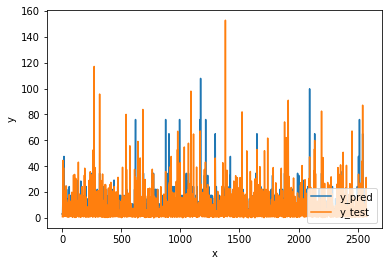

In [74]:
## Plot y
import matplotlib.pyplot as plt
line_chart1 = plt.plot(range(1, 2579), y_pred)
line_chart2 = plt.plot(range(1, 2579), y_test)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['y_pred', 'y_test'], loc=4)
plt.show()

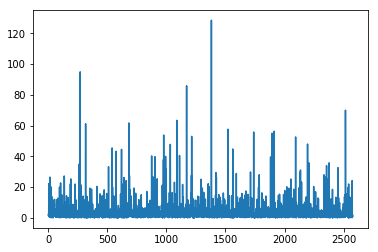

In [75]:
from math import sqrt
residual = [sqrt((a-b)**2) for a,b in zip(list(y_test['LOS']), list(y_pred))]
plt.plot(range(1, 2579), residual)

In [58]:
pd.DataFrame(np.array(y_pred))

,0
0,7.734939
1,2.249126
2,14.533977
3,2.874906
4,3.825246
5,4.607632
6,3.825246
7,17.503625
8,2.249126
9,2.249126


In [57]:
y_test

,LOS
6769,5.2495
6764,2.2860
8523,9.4348
2880,0.8521
456,1.7978
909,21.1915
5898,2.3109
5392,8.3160
1242,1.3847
923,2.1624


In [76]:
regressor.score(X_test, y_test)

0.34208395021204197